# Classification

- An example with the mnist fashion dataset

Classification deals with categorical variables

In [32]:
import tensorflow as tf
import numpy as np

Initialize Constants

In [33]:
batch_size = 128
epochs = 30
lr = 0.1
n_classes = 10

In [82]:
labels = ['shirt', 'trousers', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


In [35]:
# load dataset
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
x_train.shape

(60000, 28, 28)

In [37]:
# Normalize the features

x_train = x_train.astype(np.float32) / 255.
x_test  = x_test.astype(np.float32) / 255.

# Flatten the feature set
img_shape = x_train.shape[1:]
w, h = img_shape

x_train = x_train.reshape([x_train.shape[0], w * h])
x_test = x_test.reshape(x_test.shape[0], w * h)


In [38]:

# Split the training data to training and validation sets

idx = int(.9 * x_train.shape[0])

x_train, x_valid = x_train[:idx], x_train[idx:,]
y_train, y_valid = y_train[:idx], y_train[idx:,]

In [39]:

#Use one-hot encoding for the labels

y_train = tf.one_hot(y_train, depth=n_classes).numpy()
y_test = tf.one_hot(y_test, n_classes).numpy()
y_valid = tf.one_hot(y_valid, n_classes).numpy()

##### Let's have a look at the dataset

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

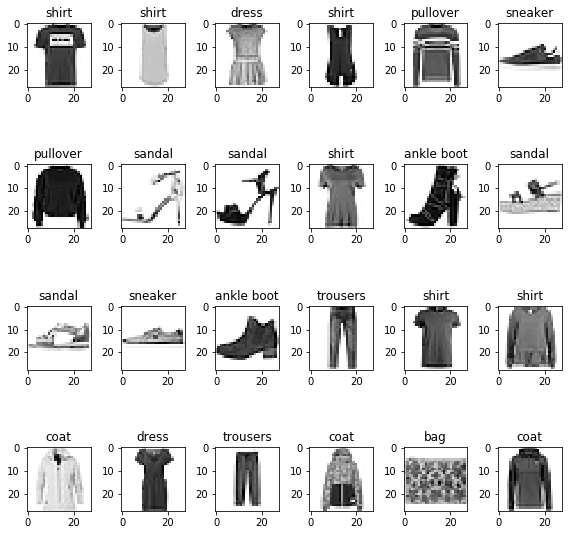

In [101]:
fig=plt.figure(figsize=(8, 8))
columns = 6
rows = 4
for i in range(1, columns*rows +1):
    img = np.reshape(x_train[i], [w, h])
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(labels[np.argmax(y_train[i])])

    
    plt.imshow(img, cmap='Greys')
plt.tight_layout()
plt.show()

#### Define the model

In [40]:
class LogRegression(tf.keras.Model):
    def __init__(self, n_classes):
        super(LogRegression, self).__init__()
        self.dense = tf.keras.layers.Dense(n_classes)
    
    def call(self, inputs, training=None, mask=None):
        output_ = self.dense(inputs)
        return tf.nn.softmax(output_)
    

#### Build and compile the model

In [103]:
clf = LogRegression(n_classes)
clf.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy',
           metrics=['accuracy'])

In [104]:
save_path = './models.1.weights.hdf5'
checkpnt = tf.keras.callbacks.ModelCheckpoint(filepath=save_path,
                                verbose=2,
                                save_best_only=True,
                                save_weights_only=True)

In [ ]:
# train
clf.fit(x_train, y_train,
       batch_size=batch_size, epochs=epochs,
       validation_data=(x_valid, y_valid),
       callbacks=[checkpnt],
       verbose=2)

# Load model with best validation accuracy
clf.load_weights(save_path)

#### Evaluate model

In [54]:
clf.evaluate(x_test, y_test, batch_size)

10000/10000 [==============================] - 0s 16us/sample - loss: 0.4403 - accuracy: 0.8456


[0.4403349675178528, 0.8456]